Ref: https://github.com/quark0/darts/blob/master/cnn/visualize.py

In [1]:
from graphviz import Digraph

In [2]:
def residual_block(two_blocks=False, filename='residual_block'):
    # general config
    g = Digraph(
        format='pdf',
        edge_attr=dict(fontsize='20', fontname="times"),
        node_attr=dict(style='filled', shape='rect', align='center', fontsize='20', height='0.5', width='0.5', penwidth='2', fontname="times"),
        engine='dot')
    g.body.extend(['rankdir=LR'])

    # input nodes
    g.node("c_{k-2}", fillcolor='darkseagreen2')
    g.node("c_{k-1}", fillcolor='darkseagreen2')
    
    # intermediate nodes
    for i in range(4):
        g.node(str(i), fillcolor='lightblue')

    # edges
    edge_list = [
        ("c_{k-1}", '0', 'conv'),
        ("0", '1', 'conv'),
        ("c_{k-1}", '1', 'skip_connect')  
    ]
    
    if two_blocks:
        edge_list += [
            ("1", '2', 'conv'),
            ("2", '3', 'conv'),
            ("1", '3', 'skip_connect')  
        ]
    
    for u, v, op in edge_list:
        g.edge(u, v, label=op, fillcolor="gray")

    # output node
    g.node("c_{k}", fillcolor='palegoldenrod')
    
    if two_blocks:
        g.edge('3', "c_{k}", fillcolor="gray")
    else:
        g.edge('1', "c_{k}", fillcolor="gray")  
    
    return g    

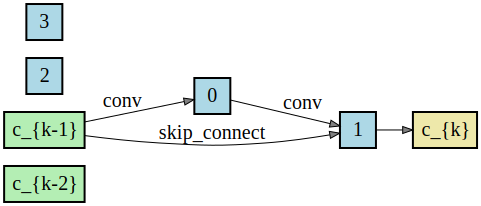

In [3]:
g = residual_block()
g.render('residual_blocks', format='png')
g

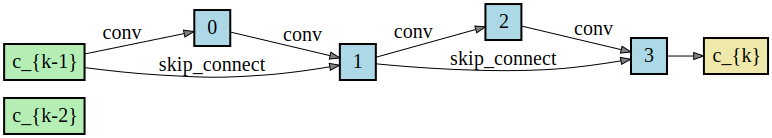

In [4]:
g = residual_block(two_blocks=True)
g.render('two_blocks.png', format='png')
g